# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import numpy as np
import pandas as pd
import time

# import API Key
from keys import api_key

# import citipy
from citipy import citipy

# Output File (CSV) for city data
output_data_file = "city_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [18]:
#add lists
cities=[]
lat_lng=[]

#create random latitudes and longitudes and add to the lat_lng list 
latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(latitudes, longitudes)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count (over 500)
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
#lists for the dataframe
city_dflist = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

# set counts
record_count = 0
set_count = 1

# loops to run API calls for the cities
print("Beginning Data Retrieval")
print("-----------------------------------------")
for city in cities:    
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        #reset count after 
        if record_count > 48:
            record_count = 1
            set_count += 1
            city_dflist.append(city)
        else:
            record_count += 1
            city_dflist.append(city)
        print(f'Processing Record {record_count} of Set {set_count} | {city}')
    except:
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
-----------------------------------------
Processing Record 1 of Set 1 | madimba
Processing Record 2 of Set 1 | muisne
Processing Record 3 of Set 1 | buala
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | severo-yeniseyskiy
Processing Record 11 of Set 1 | zanjan
Processing Record 12 of Set 1 | nemuro
Processing Record 13 of Set 1 | abu kamal
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | quatre cocos
Processing Record 18 of Set 1 | ahipara
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | clyde river
Processing Record 23 of Set 1 |

Processing Record 42 of Set 4 | kloulklubed
Processing Record 43 of Set 4 | hearst
City not found. Skipping...
Processing Record 44 of Set 4 | scarborough
Processing Record 45 of Set 4 | asmar
Processing Record 46 of Set 4 | lexington
Processing Record 47 of Set 4 | naze
Processing Record 48 of Set 4 | mananjary
Processing Record 49 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | wajid
Processing Record 2 of Set 5 | garden city
Processing Record 3 of Set 5 | grindavik
Processing Record 4 of Set 5 | birjand
Processing Record 5 of Set 5 | yeppoon
Processing Record 6 of Set 5 | aurangabad
Processing Record 7 of Set 5 | tuatapere
Processing Record 8 of Set 5 | lavrentiya
Processing Record 9 of Set 5 | srednekolymsk
Processing Record 10 of Set 5 | tabou
Processing Record 11 of Set 5 | mtwara
Processing Record 12 of Set 5 | norman wells
Processing Record 13 of Set 5 | letlhakeng
Processing Record 14 of Set 5 | vigrestad
Processing Record 15 of Set 5 | santo domingo
Processing Record 16 of

Processing Record 39 of Set 8 | vila velha
Processing Record 40 of Set 8 | rakke
Processing Record 41 of Set 8 | kokopo
Processing Record 42 of Set 8 | blackwater
Processing Record 43 of Set 8 | sambava
Processing Record 44 of Set 8 | santander jimenez
Processing Record 45 of Set 8 | solhan
Processing Record 46 of Set 8 | coihaique
Processing Record 47 of Set 8 | tiznit
Processing Record 48 of Set 8 | maryborough
Processing Record 49 of Set 8 | linjiang
Processing Record 1 of Set 9 | porto nacional
Processing Record 2 of Set 9 | kholodnyy
Processing Record 3 of Set 9 | wakkanai
Processing Record 4 of Set 9 | zhigansk
Processing Record 5 of Set 9 | shingu
Processing Record 6 of Set 9 | evensk
Processing Record 7 of Set 9 | ambon
Processing Record 8 of Set 9 | sorata
Processing Record 9 of Set 9 | sheridan
Processing Record 10 of Set 9 | majene
Processing Record 11 of Set 9 | kungurtug
Processing Record 12 of Set 9 | mitsamiouli
Processing Record 13 of Set 9 | bemidji
Processing Record 1

Processing Record 31 of Set 12 | lasa
Processing Record 32 of Set 12 | guadalupe
Processing Record 33 of Set 12 | lannion
Processing Record 34 of Set 12 | gorlice
Processing Record 35 of Set 12 | okahandja
Processing Record 36 of Set 12 | san benito
Processing Record 37 of Set 12 | southbridge
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
#Create dataframe
weather_df= pd.DataFrame({
    "City":city_dflist,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates})

# output data to csv
weather_df.to_csv(output_data_file, index=False, header=True)

#print dataframe
weather_df.head(25)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,madimba,-10.4000,40.3333,72.14,89,74,5.84,TZ,1622675485
1,muisne,0.6000,-80.0333,76.95,82,89,7.72,EC,1622675485
2,buala,-8.1450,159.5921,84.34,73,91,5.91,SB,1622675485
3,butaritari,3.0707,172.7902,82.20,80,100,13.94,KI,1622675486
4,bengkulu,-3.8004,102.2655,76.60,84,63,4.54,ID,1622675486
5,hobart,-42.8794,147.3294,56.23,76,0,1.99,AU,1622675322
6,tuktoyaktuk,69.4541,-133.0374,37.13,71,89,10.09,CA,1622675471
7,albany,42.6001,-73.9662,65.32,92,100,1.97,US,1622675424
8,cape town,-33.9258,18.4232,61.11,64,0,3.00,ZA,1622675320
9,severo-yeniseyskiy,60.3725,93.0408,52.14,94,100,3.44,RU,1622675487


go


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
#check to see if any city has Humidity over 100%
weather_df.describe()

#per results no city had max humidity greater than 100, no need to clean data further nor find the index

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,21.260804,18.830976,66.445816,70.460069,58.217014,7.116701,1.622676e+09
std,33.939432,91.501845,15.307756,20.754846,37.293848,4.891286,7.452391e+01
min,-54.800000,-179.166700,24.910000,7.000000,0.000000,0.000000,1.622675e+09
25%,-7.438450,-65.179650,54.397500,64.000000,20.000000,3.380000,1.622676e+09
50%,25.933750,24.715700,68.105000,75.000000,70.000000,5.885000,1.622676e+09
75%,50.164650,101.172775,78.240000,86.000000,96.000000,9.672500,1.622676e+09
max,78.218600,179.316700,105.350000,100.000000,100.000000,31.070000,1.622676e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

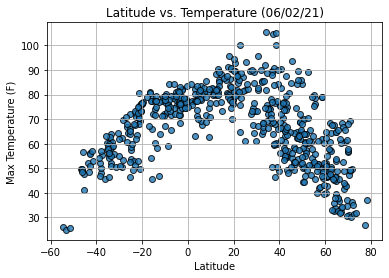

In [37]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"],edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatvsTemp.png")

## Latitude vs. Humidity Plot

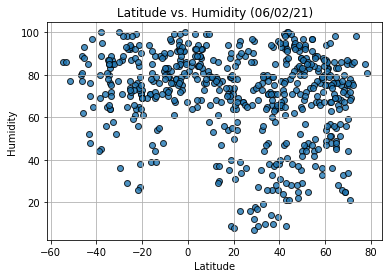

In [38]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"],edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatvsHunidity.png")

## Latitude vs. Cloudiness Plot

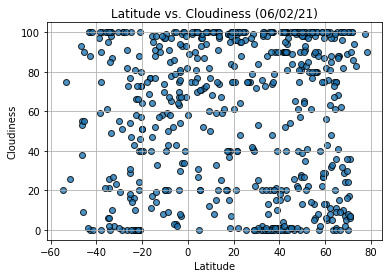

In [39]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"],edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latvscloud.png")

## Latitude vs. Wind Speed Plot

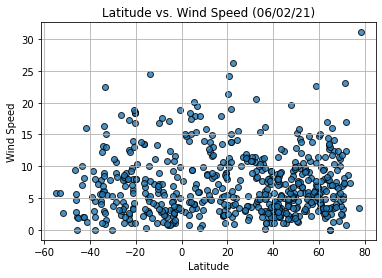

In [40]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"],edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatvsWind.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


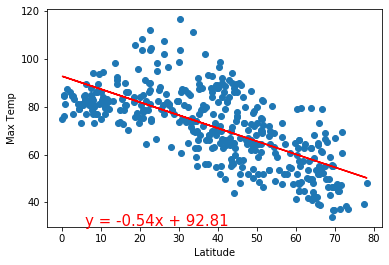

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


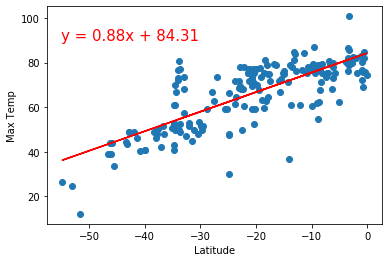

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


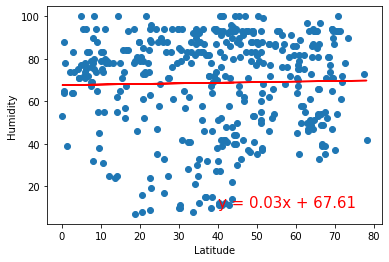

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


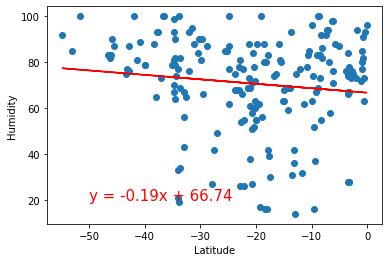

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


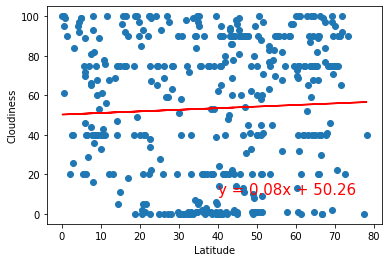

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


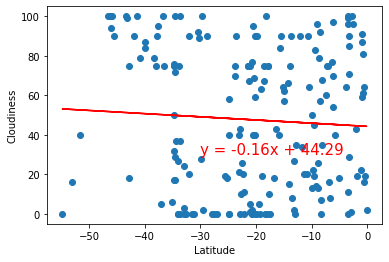

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


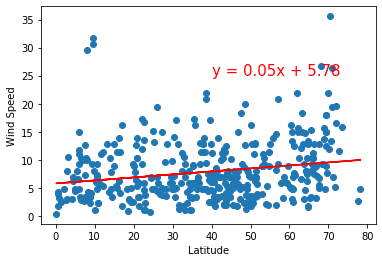

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


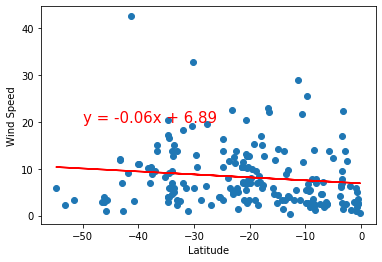